In [1]:
!git clone https://github.com/facebookresearch/ImageBind.git
!pip install git+https://github.com/facebookresearch/pytorchvideo.git@28fe037d212663c6a24f373b94cc5d478c8c1a1d timm==0.6.7 ftfy regex einops fvcore decord==0.6.0

fatal: destination path 'ImageBind' already exists and is not an empty directory.
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision 28fe037d212663c6a24f373b94cc5d478c8c1a1d) to /private/var/folders/fr/d_m1dl4968d6dkzh1_1hy4jh0000gn/T/pip-req-build-q4jaudb_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /private/var/folders/fr/d_m1dl4968d6dkzh1_1hy4jh0000gn/T/pip-req-build-q4jaudb_
  Running command git rev-parse -q --verify 'sha^28fe037d212663c6a24f373b94cc5d478c8c1a1d'
  Running command git fetch -q https://github.com/facebookresearch/pytorchvideo.git 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Running command git checkout -q 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Resolved https://github.com/facebookresearch/pytorchvideo.git to commit 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Preparing metadata (setup.py) ... done
  Using cached timm-0.6.7-py3-none-any.whl (509 kB)
  Obtaining dependency informa

In [19]:
!pip install torch
!pip install ftfy
!pip install timm
!pip install /Users/aviajmera/Downloads/Clustering/Image Embedding/ImageBind/requirements.txt

  Obtaining dependency information for timm from https://files.pythonhosted.org/packages/01/a5/eeb717242343d9ca34e7de554a6c08d96a0cfc7005ece4f847b1753581a6/timm-0.9.12-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for huggingface-hub from https://files.pythonhosted.org/packages/05/09/1945ca6ba3ad8ad6e2872ba682ce8d68c5e63c8e55458ed8ab4885709f1d/huggingface_hub-0.19.4-py3-none-any.whl.metadata
  Obtaining dependency information for safetensors from https://files.pythonhosted.org/packages/ce/5c/febb2ab109a91a7993fcb0595364f04121e35bdf647028e8d01f9762ce00/safetensors-0.4.1-cp311-cp311-macosx_10_7_x86_64.whl.metadata
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/e8/f6/3eccfb530aac90ad1301c582da228e4763f19e719ac8200752a4841b0b2d/fsspec-2023.10.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.8 MB/s eta 0:00:0

In [11]:
%cd /Users/aviajmera/Downloads/Clustering/Image Embedding/ImageBind

/Users/aviajmera/Downloads/Clustering/Image Embedding/ImageBind


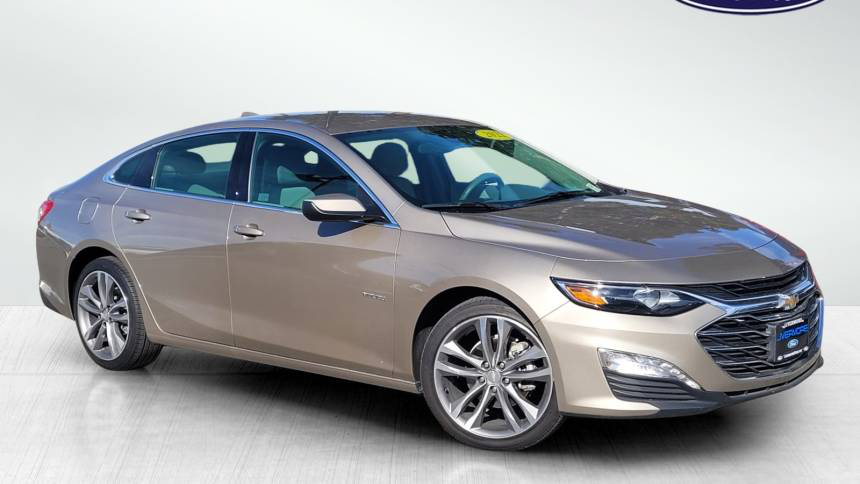

In [12]:
import IPython
from PIL import Image

display(Image.open("/Users/aviajmera/Downloads/Clustering/Image Embedding/SUV4UO4ADC4JQ2YDXXU4XNLSLQ-cr-860.jpg"))

In [25]:
%cd /Users/aviajmera/Downloads/Clustering/Image Embedding/ImageBind/imagebind

/Users/aviajmera/Downloads/Clustering/Image Embedding/ImageBind/imagebind


In [22]:
!pip install einops

  Obtaining dependency information for einops from https://files.pythonhosted.org/packages/29/0b/2d1c0ebfd092e25935b86509a9a817159212d82aa43d7fb07eca4eeff2c2/einops-0.7.0-py3-none-any.whl.metadata
  Using cached einops-0.7.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.3 MB/s eta 0:00:00


In [28]:

import torch
import torchvision
from imagebind import data
from models import imagebind_model
from models.imagebind_model import ModalityType


device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [29]:
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

100%|██████████| 4.47G/4.47G [01:51<00:00, 42.9MB/s]


ImageBindModel(
  (modality_preprocessors): ModuleDict(
    (vision): RGBDTPreprocessor(
      (cls_token): tensor((1, 1, 1280), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Sequential(
          (0): PadIm2Video()
          (1): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
      )
      (pos_embedding_helper): SpatioTemporalPosEmbeddingHelper(
        (pos_embed): tensor((1, 257, 1280), requires_grad=True)
        
      )
    )
    (text): TextPreprocessor(
      (pos_embed): tensor((1, 77, 1024), requires_grad=True)
      (mask): tensor((77, 77), requires_grad=False)
      
      (token_embedding): Embedding(49408, 1024)
    )
    (audio): AudioPreprocessor(
      (cls_token): tensor((1, 1, 768), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10), bias=False)
        (norm_layer): LayerNorm((768,), eps=1e-05, elementwise_affine=

In [31]:

inputs = {
    ModalityType.VISION: data.load_and_transform_vision_data(["/Users/aviajmera/Downloads/Clustering/Image Embedding/SUV4UO4ADC4JQ2YDXXU4XNLSLQ-cr-860.jpg"], device),
}

with torch.no_grad():
    embeddings = model(inputs)


In [32]:
print(
    "Vision x Text: ",
    embeddings[ModalityType.VISION]
)

Vision x Text:  tensor([[ 0.0413, -0.0308, -0.0294,  ...,  0.0049,  0.0338, -0.0209]])
